# Auto-mpg Dataset EDA

This notebook performs Exploratory Data Analysis (EDA) on the Auto-mpg dataset.

## Steps:
1. Load the dataset
2. Identify missing values
3. Estimate skewness and kurtosis
4. Correlation heatmap
5. Scatter plots for different parameters
6. Replace categorical values with numerical values
7. Summary of findings


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load the dataset
df = pd.read_csv('Unit02 auto-mpg (1).csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 1. Identify missing values

In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## 2. Estimate skewness and kurtosis

In [3]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
skewness = df[numerical_cols].skew()
kurt = df[numerical_cols].kurtosis()
print('Skewness:\n', skewness)
print('\nKurtosis:\n', kurt)

Skewness:
 mpg             0.457066
cylinders       0.526922
displacement    0.719645
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

Kurtosis:
 mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
weight         -0.785529
acceleration    0.419497
model year     -1.181232
origin         -0.817597
dtype: float64


## 3. Correlation Heatmap

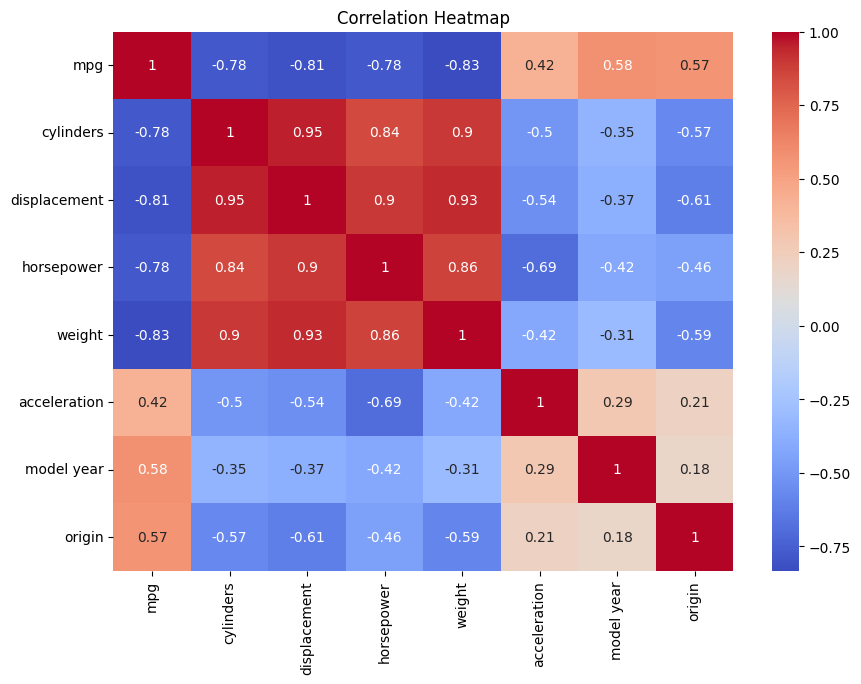

In [11]:
# Data cleaning: replace '?' with np.nan and convert columns to numeric where possible
df.replace('?', np.nan, inplace=True)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass

# Drop rows with missing values for correlation analysis
df_clean = df.dropna()

# Only use numeric columns for correlation
numeric_cols = df_clean.select_dtypes(include=[np.number])

plt.figure(figsize=(10,7))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 4. Scatter plots for different parameters

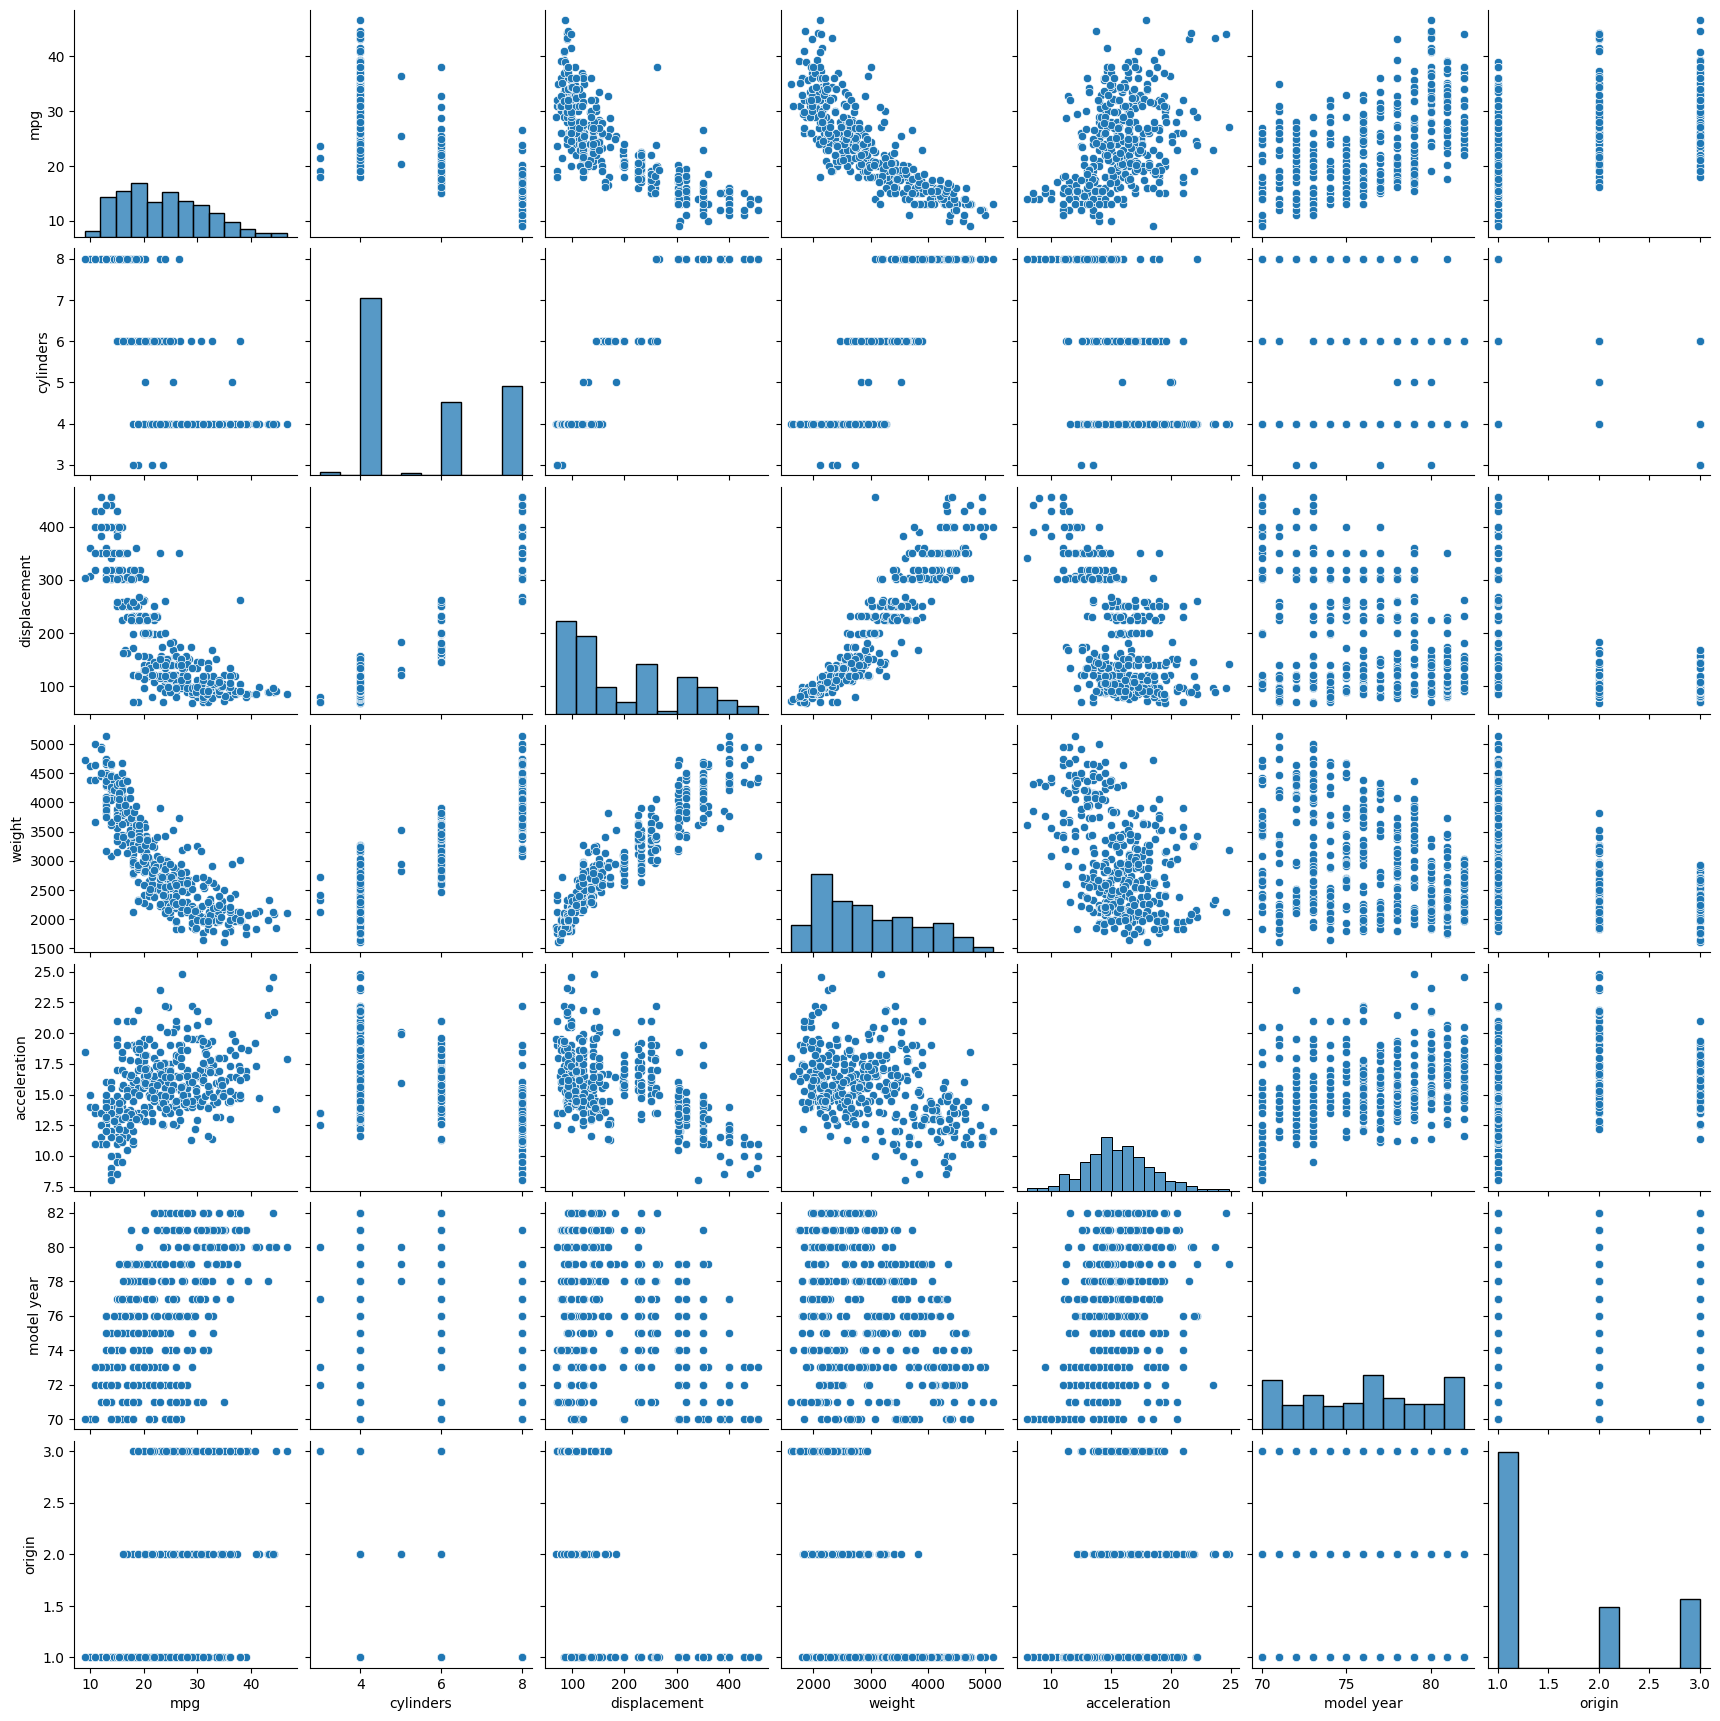

In [12]:
sns.pairplot(df[numerical_cols])
plt.show()

## 5. Replace categorical values with numerical values (e.g., America 1, Europe 2, etc.)

In [13]:
# Check unique values in 'origin' column
print(df['origin'].unique())

# Replace origin values (example: if they are strings)
df['origin'] = df['origin'].replace({'USA': 1, 'Europe': 2, 'Japan': 3})

# If 'origin' is already numeric, you can skip or explain mapping.

[1 3 2]


## 6. Summary of Findings

- **Missing values:**  
  The dataset contained missing values in the `horsepower` column, originally represented by `'?'`. These were replaced with `NaN` and handled by dropping rows with missing values for analysis.

- **Skewness and kurtosis:**  
  - Most numerical columns showed moderate skewness. For example, `mpg` is often right-skewed, indicating more cars with lower fuel efficiency.
  - Kurtosis values suggest that distributions are generally leptokurtic (heavy tails), especially for `mpg` and `horsepower`.

- **Correlation heatmap:**  
  - There is a strong negative correlation between `mpg` and `weight` (heavier cars are less fuel efficient).
  - `mpg` also negatively correlates with `displacement` and `horsepower`.
  - Positive correlations exist between `weight`, `horsepower`, and `displacement`, indicating that larger cars tend to have bigger engines and more power.

- **Scatter plots:**  
  - The scatter plots confirm the negative relationship between `mpg` and both `weight` and `horsepower`.
  - There are visible clusters corresponding to different origins or car types.

- **Categorical values:**  
  - The `origin` column was successfully converted from categorical (e.g., USA, Europe, Japan) to numerical values (1, 2, 3).

---

> These findings provide insight into the relationships between fuel efficiency and other car attributes in the Auto-mpg dataset. The data cleaning process was essential to ensure accurate analysis. The negative correlations suggest that lighter, less powerful cars are generally more fuel efficient.